In [1]:
import pandas as pd 


# Carico il dataset
df = pd.read_csv("Dataset\Student_performance_data _.csv")

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lucab\AppData\Local\Temp\ipykernel_20588\2320224687.py:5: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Dataset\Student_performance_data _.csv")


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df = df.drop(columns=["StudentID"])
df = df.drop(columns=["GradeClass"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


# Applicazione K-Means

In [3]:

# Se necessario, normalizza i dati (importante per K-Means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:
# Riduco la dimensionalità 
from sklearn.manifold import TSNE

# Applicare t-SNE per ridurre la dimensionalità a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
df_scaled_2d_tsne = tsne.fit_transform(df_scaled)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista per memorizzare la somma delle distanze al quadrato (distorsione) per ciascun numero di cluster
wcss = []

# Iteriamo per un range di valori di k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=30000, n_init=1000, random_state=42)
    kmeans.fit(df_scaled_2d_tsne)
    wcss.append(kmeans.inertia_)



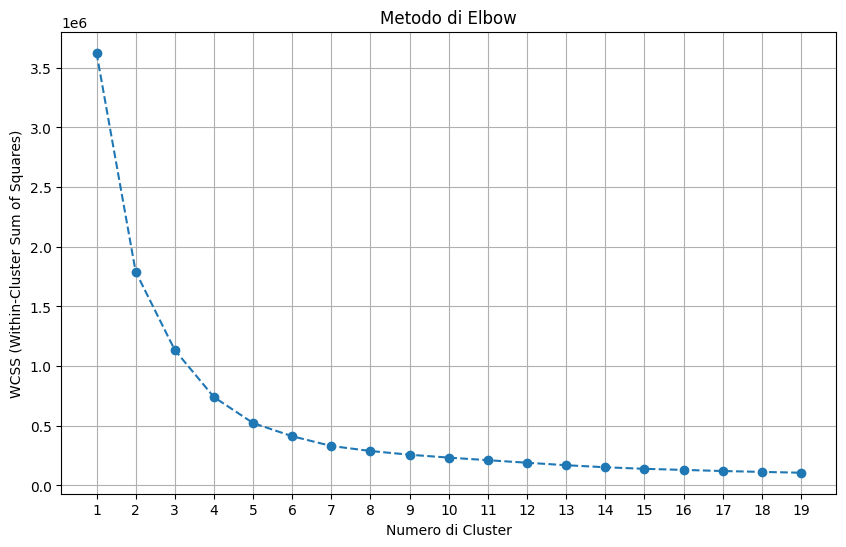

In [8]:
# Grafico del metodo di Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Metodo di Elbow')
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

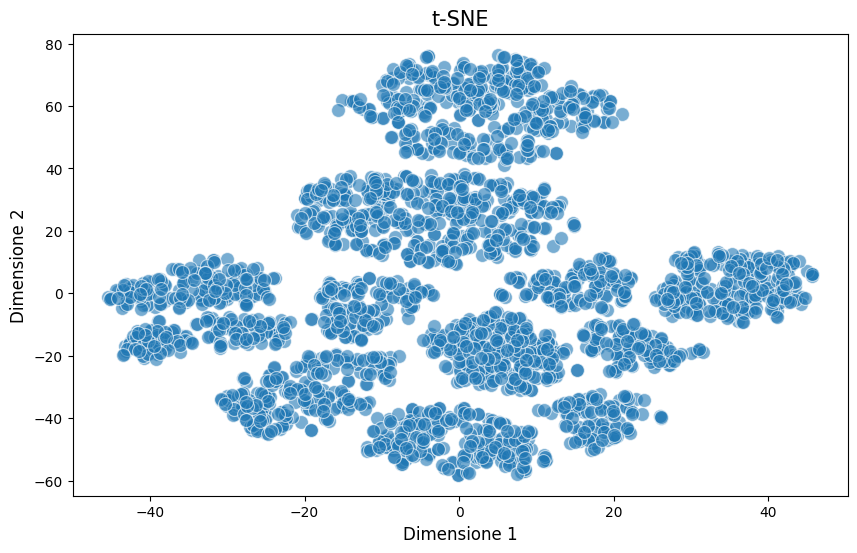

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo il grafico 2D del risultato t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_2d_tsne[:, 0], y=df_scaled_2d_tsne[:, 1], s=100, alpha=0.6, edgecolor="w")

# Aggiungiamo etichette e titolo
plt.title('t-SNE', fontsize=15)
plt.xlabel('Dimensione 1', fontsize=12)
plt.ylabel('Dimensione 2', fontsize=12)

# Mostriamo il grafico
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Impostiamo il numero di cluster, ad esempio, 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=30000, n_init=1000, random_state=42)

# Fitting del modello
kmeans.fit(df_scaled_2d_tsne)

# Otteniamo i cluster assegnati a ciascun dato
df['Cluster'] = kmeans.labels_
#df.head()

In [12]:

# Creare un DataFrame per le dimensioni ridotte
df_tsne = pd.DataFrame(df_scaled_2d_tsne, columns=['TSNE1', 'TSNE2'])

# Unire le dimensioni originali al DataFrame ridotto
df_combined_Kmeans = pd.concat([df_tsne, df], axis=1)


df_combined_Kmeans.head()

,TSNE1,TSNE2,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Cluster
0,-18.546322,22.299623,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1
1,1.751783,-9.370904,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,3
2,7.903247,-31.067690,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,2
3,-33.286037,1.737102,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,0
4,6.713884,-53.783840,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,2


In [13]:
# Conta il numero di campioni per ciascun cluster
cluster_counts = df_combined_Kmeans['Cluster'].value_counts()

# Stampa il numero di campioni per cluster
print(cluster_counts)


Cluster
2    598
3    537
0    485
1    396
4    376
Name: count, dtype: int64


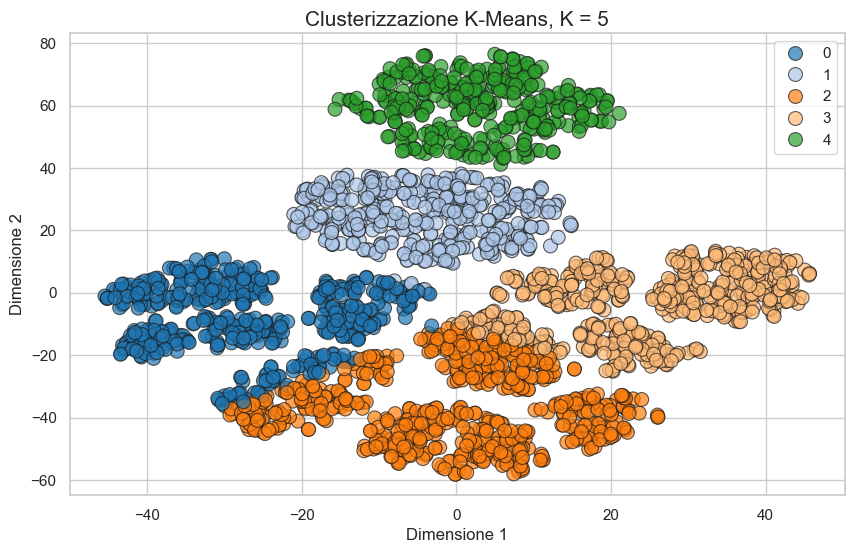

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Creiamo una palette di colori per i cluster, usando una palette con più colori vivaci (tab20)
sns.set(style="whitegrid")
palette = sns.color_palette("tab20", n_colors=len(np.unique(df['Cluster'])))

# Impostiamo il grafico a dispersione (scatter plot)
plt.figure(figsize=(10, 6))

# Mostriamo i dati con i cluster
sns.scatterplot(x=df_scaled_2d_tsne[:, 0], y=df_scaled_2d_tsne[:, 1], hue=df['Cluster'], palette=palette, s=100, alpha=0.7, edgecolor="k", legend="full")

# Aggiungiamo etichette al grafico
plt.title('Clusterizzazione K-Means, K = 5', fontsize=15)
plt.xlabel('Dimensione 1', fontsize=12)
plt.ylabel('Dimensione 2', fontsize=12)
plt.legend()

# Mostriamo il grafico
plt.show()


#### Analisi risultati

Le medie GPA degli individui nei diversi cluster sono molto diverse tra di loro. SI osserva come il cluster 8(176 studenti) sia composto da individui mediamente bravi, mentre il cluster 3(216 studenti) sia composto da individui mediamente meno bravi.
Inoltre, il cluster 8 ha anche una varianza piu bassa rispetto al cluster 3.

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\650142681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='GPA', data=df_combined_Kmeans, palette='Set2')


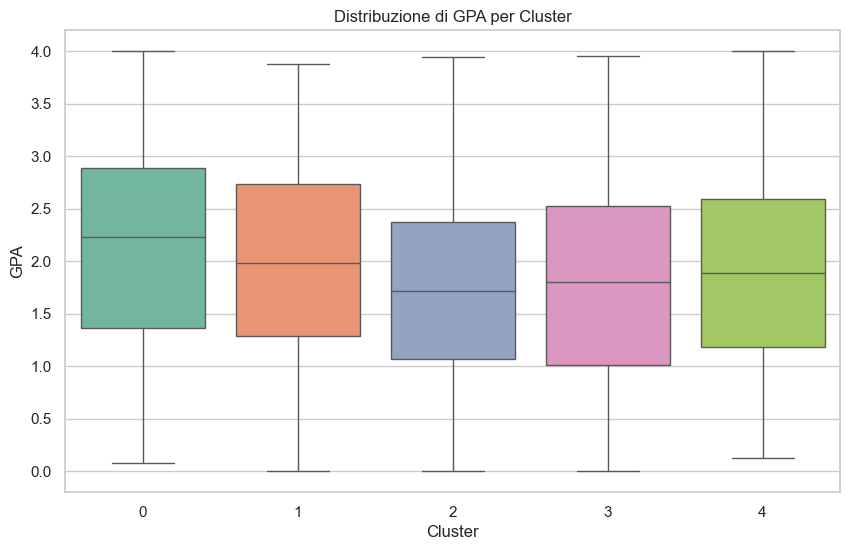

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea il boxplot per i valori di 'GPA' per ciascun cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='GPA', data=df_combined_Kmeans, palette='Set2')

# Aggiungi etichette e titolo
plt.xlabel('Cluster')
plt.ylabel('GPA')
plt.title('Distribuzione di GPA per Cluster')

# Mostra il grafico
plt.show()


In [17]:
# Calcolare le statistiche per i valori di GPA per ciascun cluster
cluster_stats = df_combined_Kmeans.groupby('Cluster')['GPA'].agg(['mean', 'std', 'var'])

# Visualizza le statistiche
print(cluster_stats)


             mean       std       var
Cluster                              
0        2.119312  0.971103  0.943040
1        2.016917  0.898228  0.806813
2        1.755628  0.860796  0.740970
3        1.794871  0.898237  0.806830
4        1.913089  0.902488  0.814484


C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\816569585.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_means, x='Cluster', y='Age', palette='viridis', ax=ax1)


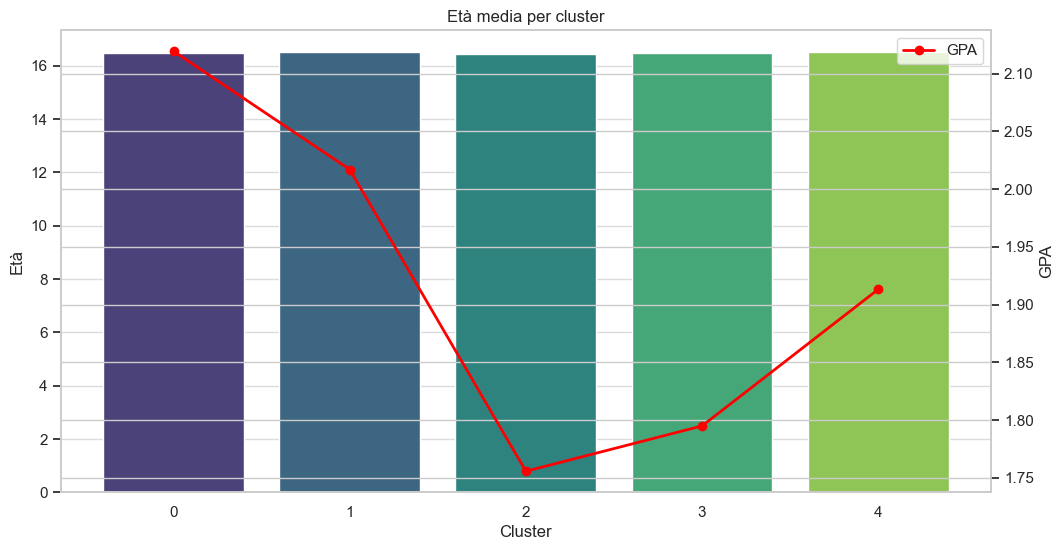

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calcola il valore medio di Age per cluster
age_means = df_combined_Kmeans.groupby('Cluster')['Age'].mean().reset_index()

# Calcola la media di GPA per cluster
gpa_means = df_combined_Kmeans.groupby('Cluster')['GPA'].mean().reset_index()

# Imposta il tipo di cluster come categoria per un ordinamento migliore
age_means['Cluster'] = age_means['Cluster'].astype(int)
gpa_means['Cluster'] = gpa_means['Cluster'].astype(int)

# Ordina i valori per cluster
age_means = age_means.sort_values(by='Cluster')
gpa_means = gpa_means.sort_values(by='Cluster')

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per l'età media per cluster
sns.barplot(data=age_means, x='Cluster', y='Age', palette='viridis', ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Età')
ax1.set_title('Età media per cluster')
ax1.grid(axis='y', alpha=0.7)

# Crea un secondo asse y per la linea della media di GPA
ax2 = ax1.twinx()

# Aggiungi la linea rossa per la media di GPA
ax2.plot(gpa_means['Cluster'], gpa_means['GPA'], color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper right')

# Mostra il grafico
plt.show()


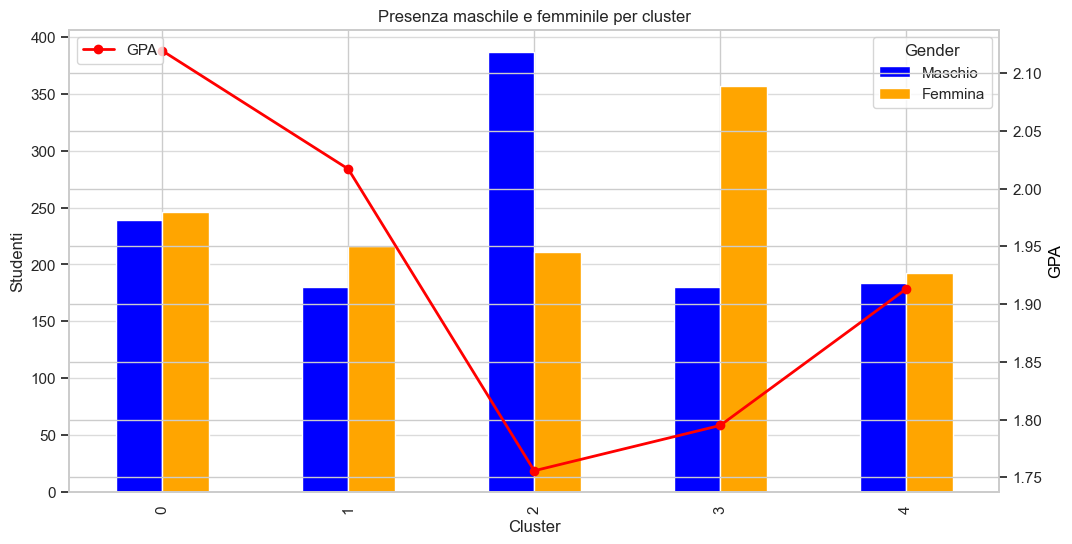

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteggio uomini (0) e donne (1) per cluster
gender_counts = df_combined_Kmeans.groupby('Cluster')['Gender'].value_counts().unstack(fill_value=0)

# Calcola la media di GPA per ogni cluster
gpa_means = df_combined_Kmeans.groupby('Cluster')['GPA'].mean()

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per il conteggio di uomini e donne per cluster
gender_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Studenti')
ax1.set_title('Presenza maschile e femminile per cluster')
ax1.legend(title='Gender', labels=['Maschio', 'Femmina'])
ax1.grid(axis='y', alpha=0.7)

# Aggiungi un secondo asse y per il valore di GPA
ax2 = ax1.twinx()

# Aggiungi una linea rossa per i valori di GPA medio
ax2.plot(gpa_means.index, gpa_means.values, color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA', color='black')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper left')

# Mostra il grafico
plt.show()


C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\454064299.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_means, x='Cluster', y='StudyTimeWeekly', palette='viridis', ax=ax1)


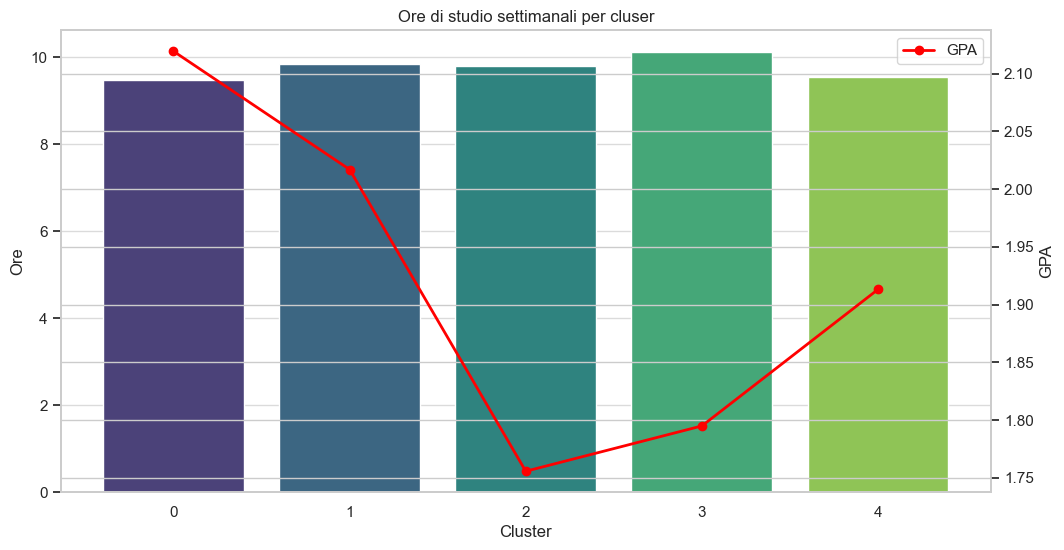

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calcola il valore medio di Age per cluster
age_means = df_combined_Kmeans.groupby('Cluster')['StudyTimeWeekly'].mean().reset_index()

# Calcola la media di GPA per cluster
gpa_means = df_combined_Kmeans.groupby('Cluster')['GPA'].mean().reset_index()

# Imposta il tipo di cluster come categoria per un ordinamento migliore
age_means['Cluster'] = age_means['Cluster'].astype(int)
gpa_means['Cluster'] = gpa_means['Cluster'].astype(int)

# Ordina i valori per cluster
age_means = age_means.sort_values(by='Cluster')
gpa_means = gpa_means.sort_values(by='Cluster')

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per l'età media per cluster
sns.barplot(data=age_means, x='Cluster', y='StudyTimeWeekly', palette='viridis', ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Ore')
ax1.set_title('Ore di studio settimanali per cluser')
ax1.grid(axis='y', alpha=0.7)

# Crea un secondo asse y per la linea della media di GPA
ax2 = ax1.twinx()

# Aggiungi la linea rossa per la media di GPA
ax2.plot(gpa_means['Cluster'], gpa_means['GPA'], color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper right')

# Mostra il grafico
plt.show()


## Performance Modello

Punteggio medio silhouette: 0.46


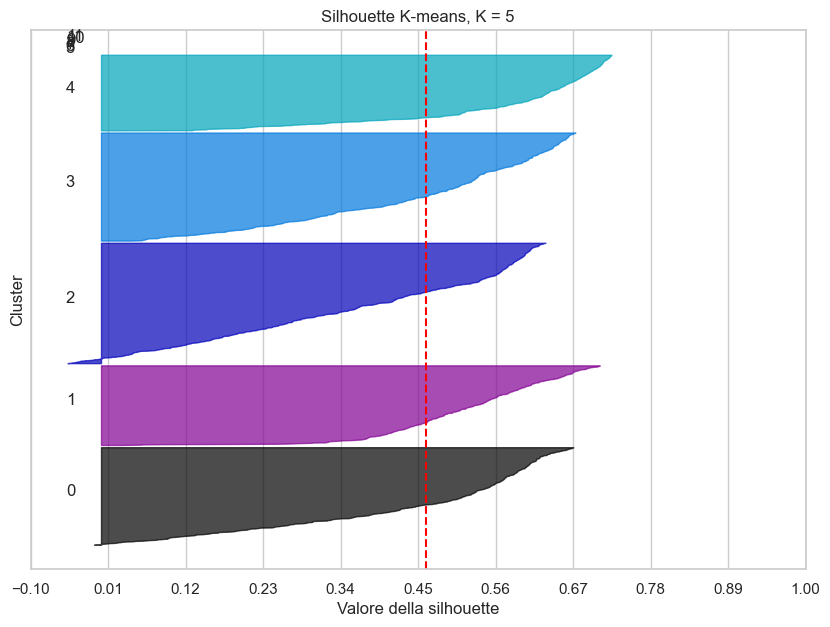

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcolo del punteggio della silhouette
silhouette_avg = silhouette_score(df_scaled_2d_tsne, df['Cluster'])
print(f'Punteggio medio silhouette: {silhouette_avg:.2f}')

# Calcolo della silhouette per ciascun punto
sample_silhouette_values = silhouette_samples(df_scaled_2d_tsne, df['Cluster'])

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
y_lower = 10  # Spaziatura iniziale tra i cluster

for i in range(12):  # Assumendo 12 cluster
    # Raccolta dei valori di silhouette per il cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 12)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etichetta per ciascun cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 per spaziatura tra i plot

ax.set_title("Silhouette K-means, K = 5")
ax.set_xlabel("Valore della silhouette")
ax.set_ylabel("Cluster")

# Tracciare la linea media della silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Rimozione delle etichette sull'asse Y
ax.set_xticks(np.linspace(-0.1, 1.0, 11))
plt.show()


# Applicazione DB-Scan

In [28]:
import pandas as pd 
df = pd.read_csv("Dataset\Student_performance_data _.csv")
df.head()
len(df)

2392

In [29]:
df = df.drop(columns=["StudentID"])
df = df.drop(columns=["GradeClass"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Valore medio della densità (con raggio eps=5): 1164.7959866220735


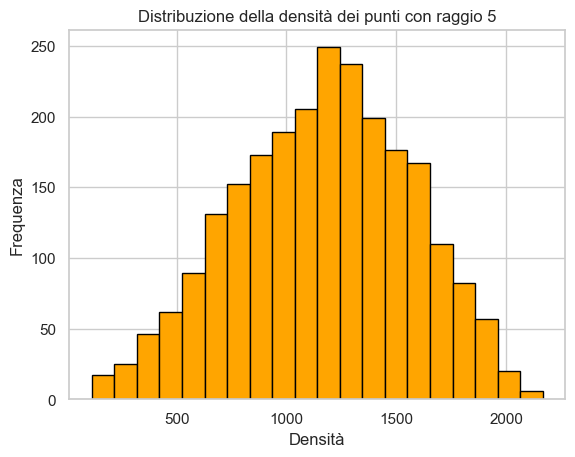

In [31]:
from sklearn.metrics.pairwise import euclidean_distances

# Imposta il valore di eps
eps = 5  # Raggio di distanza

# Calcolare la matrice delle distanze Euclidee
dist_matrix = euclidean_distances(df_scaled)

# Contare quanti punti sono all'interno del raggio eps per ciascun punto
densities = np.sum(dist_matrix <= eps, axis=1)

# Aggiungere le densità al dataframe
df_info = pd.DataFrame(columns=['density_eps'])
df_info['density_eps'] = densities

# Calcolare la densità media
average_density_eps = np.mean(densities)

# Visualizzare il valore medio della densità
print(f'Valore medio della densità (con raggio eps={eps}): {average_density_eps}')

# Visualizzare anche la distribuzione delle densità
plt.hist(densities, bins=20, color='orange', edgecolor='black')
plt.title(f'Distribuzione della densità dei punti con raggio {eps}')
plt.xlabel('Densità')
plt.ylabel('Frequenza')
plt.show()


In [32]:
# Riduco la dimensionalità 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
df_scaled_tsne = tsne.fit_transform(df_scaled)

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\2407858499.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(k_values))


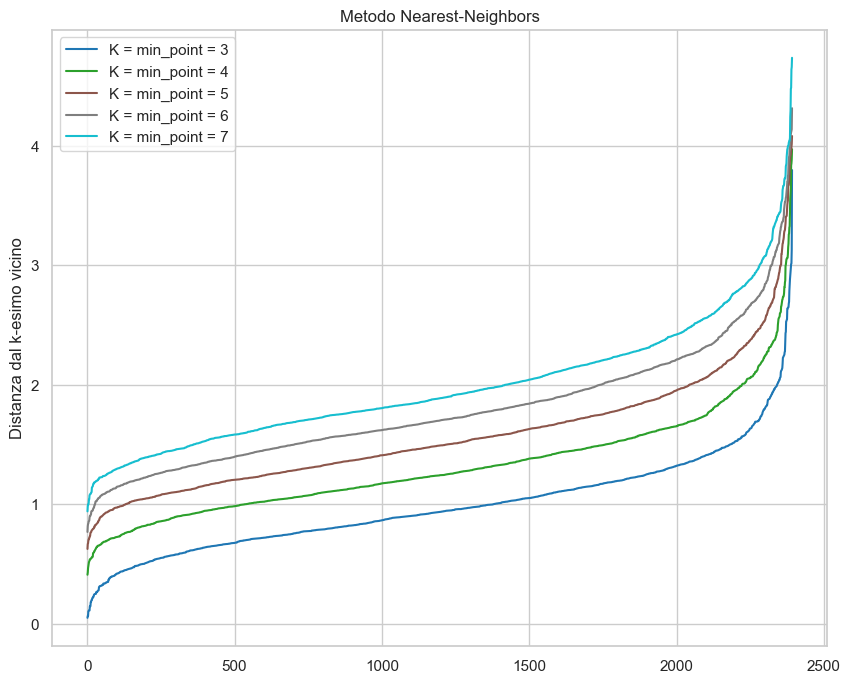

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assumiamo che df_scaled_tsne sia già un array numpy
X = df_scaled_tsne  # X è il tuo array numpy di dati scalati e ridotti tramite t-SNE

# Lista di k per cui calcolare il grafico
k_values = [3, 4, 5, 6, 7]

plt.figure(figsize=(10, 8))

colors = plt.cm.get_cmap('tab10', len(k_values))

# Iterare su diversi valori di k e tracciare il grafico per ciascuno
for i, k in enumerate(k_values):
    # Calcolare la matrice delle distanze dei vicini
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    
    # Calcolare le distanze dei vicini
    distances, indices = neighbors.kneighbors(X)
    
    # Ordinare le distanze del k-esimo vicino (distances[:, -1] è la distanza dal k-esimo vicino)
    distances = np.sort(distances[:, -1], axis=0)
    
    # Tracciare il grafico per il valore di k corrente
    plt.plot(np.arange(1, len(distances) + 1), distances, label=f'K = min_point = {k}',  color=colors(i))

# Aggiungere il titolo e le etichette
plt.title('Metodo Nearest-Neighbors')
plt.ylabel('Distanza dal k-esimo vicino')
plt.legend()
plt.grid(True)

# Visualizzare il grafico
plt.show()


In [34]:
# Addestriamo il modello DBSCAN con l'eps trovato
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(df_scaled_tsne)


DBSCAN(eps=3)

In [35]:
# Creare un DataFrame per le dimensioni ridotte
df_tsne = pd.DataFrame(df_scaled_tsne, columns=['TSNE1', 'TSNE2'])

# Unire le dimensioni originali al DataFrame ridotto
df_combined_DbScan = pd.concat([df_tsne, df], axis=1)


df_combined_DbScan.head()

,TSNE1,TSNE2,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,-18.546322,22.299623,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1.751783,-9.370904,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,7.903247,-31.067690,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,-33.286037,1.737102,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,6.713884,-53.783840,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


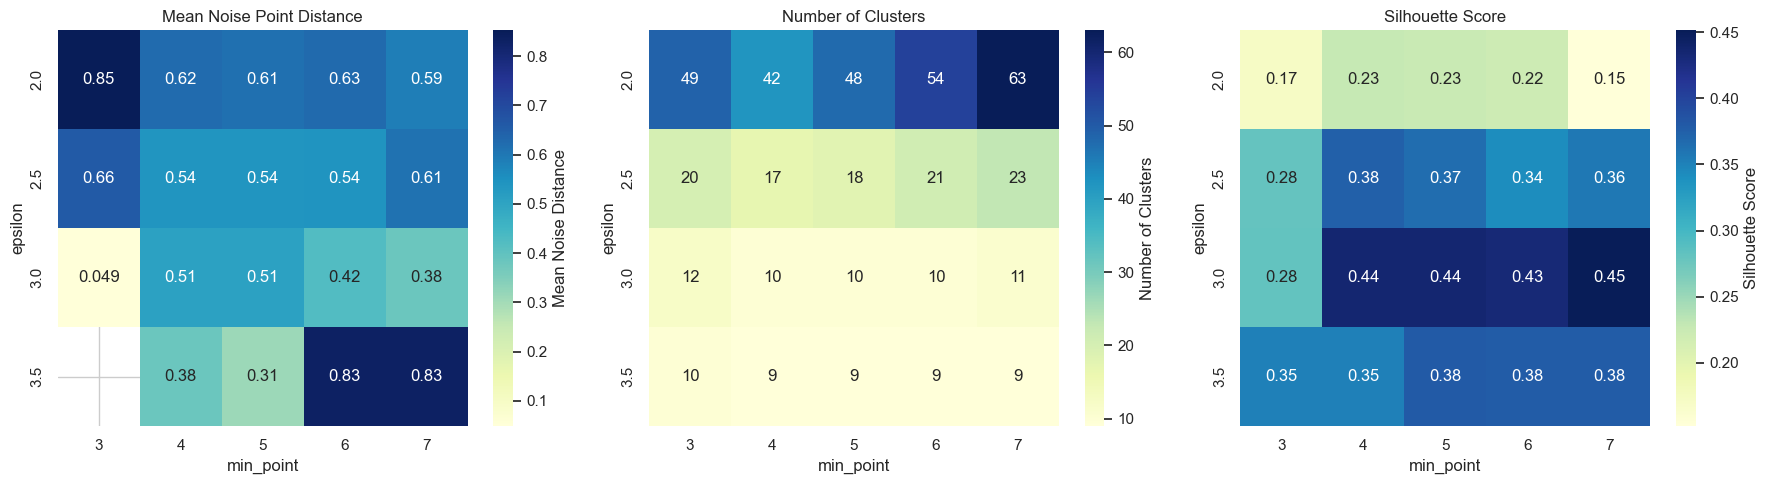

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Lista dei min_point da analizzare
min_points = [3,4,5,6,7]

# Intervallo di valori per epsilon da testare
eps_values = [2,2.5,3,3.5]

# Dataframe dove memorizziamo i risultati
results = []

# Calcolare le metriche per ciascun valore di min_point ed epsilon
for min_pt in min_points:
    for eps in eps_values:
        # DBSCAN con i parametri min_samples e epsilon
        db = DBSCAN(eps=eps, min_samples=min_pt, p=1)
        clusters = db.fit_predict(df_scaled_tsne)

        # Numero di cluster
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Ignorando i punti rumorosi
        
        # Identificare i punti rumorosi (-1 indica punti rumorosi in DBSCAN)
        noise_points = df_scaled_tsne[clusters == -1]
        
        # Calcolare la distanza media dei punti rumorosi
        if len(noise_points) > 0:
            nbrs = NearestNeighbors(n_neighbors=2).fit(df_scaled_tsne)
            distances, indices = nbrs.kneighbors(noise_points)
            mean_noise_distance = np.mean(distances[:, 1])  # Distanza media del secondo vicino
        else:
            mean_noise_distance = np.nan  # Nessun punto rumoroso
        
        # Calcolare il silhouette score (solo se ci sono cluster)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(df_scaled_tsne, clusters)
        else:
            silhouette_avg = np.nan  # Se c'è un solo cluster, il silhouette score non è definito
        
        # Memorizzare i risultati
        results.append({
            'min_point': min_pt,
            'epsilon': eps,
            'mean_noise_distance': mean_noise_distance,
            'num_clusters': num_clusters,
            'silhouette': silhouette_avg
        })

# Creare un DataFrame dei risultati
results_df = pd.DataFrame(results)
# Creare pivot tables per visualizzare le mappe di calore
# Impostare epsilon come indice e min_point come colonne

# Mappa di calore per la distanza media dei punti rumorosi
pivot_noise_distance = results_df.pivot(index='epsilon', columns='min_point', values='mean_noise_distance')

# Mappa di calore per il numero di cluster
pivot_num_clusters = results_df.pivot(index='epsilon', columns='min_point', values='num_clusters')

# Mappa di calore per il silhouette score
pivot_silhouette = results_df.pivot(index='epsilon', columns='min_point', values='silhouette')

# Visualizzare le mappe di calore
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mappa di calore per la distanza media dei punti rumorosi
sns.heatmap(pivot_noise_distance, annot=True, cmap='YlGnBu', ax=axes[0], cbar_kws={'label': 'Mean Noise Distance'})
axes[0].set_title('Mean Noise Point Distance')

# Mappa di calore per il numero di cluster
sns.heatmap(pivot_num_clusters, annot=True, cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Number of Clusters'})
axes[1].set_title('Number of Clusters')

# Mappa di calore per il silhouette score
sns.heatmap(pivot_silhouette, annot=True, cmap='YlGnBu', ax=axes[2], cbar_kws={'label': 'Silhouette Score'})
axes[2].set_title('Silhouette Score')

# Visualizzare i grafici
plt.tight_layout()
plt.show()


Mean Noise Point Distance (prima heatmap a sinistra):
Mostra la distanza media dei punti identificati come "rumore" (noise) dal clustering, rispetto ai cluster.

Number of Clusters (heatmap centrale):
Mostra il numero di cluster identificati in base ai valori di 
𝜀 e min_points.

Silhouette Score (heatmap a destra):
Mostra il silhouette score medio per i cluster ottenuti, che misura la coesione interna dei cluster e la separazione tra cluster.

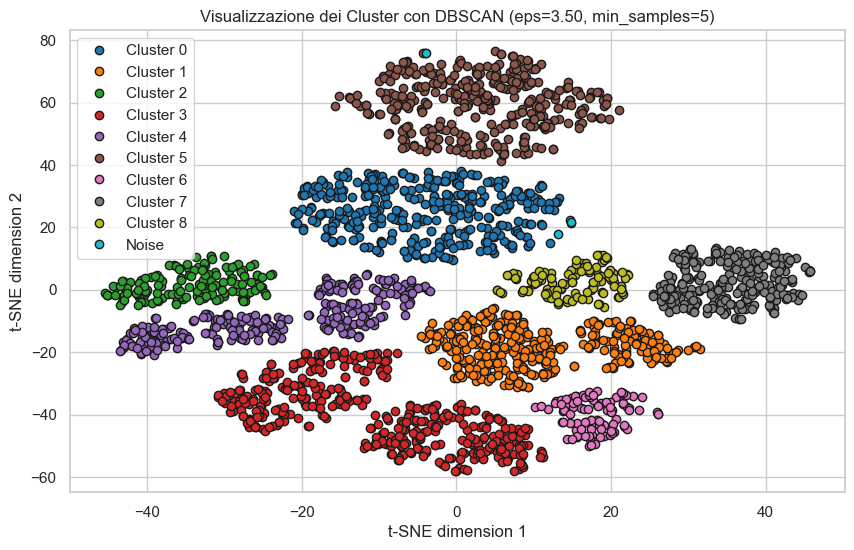

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Otteniamo i cluster dai risultati di DBSCAN
labels = db.labels_

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))

# Tracciamo ogni punto con il colore corrispondente al suo cluster
# I punti etichettati come -1 sono considerati "rumore" da DBSCAN
unique_labels = set(labels)

# Usa una lista di colori vivaci (paletta 'tab10' per una scelta di colori più forti)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    # Visualizza solo i punti che appartengono a un cluster
    plt.plot(df_scaled_tsne[class_member_mask, 0], df_scaled_tsne[class_member_mask, 1], 
             'o', markerfacecolor=col, markeredgecolor='k', markersize=6, label=f'Cluster {k}' if k != -1 else 'Noise')

# Aggiungi etichette, titolo e legenda
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title(f'Visualizzazione dei Cluster con DBSCAN (eps={eps:.2f}, min_samples={min_samples})')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()


## Analisi cluster e punti rumorosi

Escludendo la classe rara, anche qui è evidente che ciascun cluster ha rappresenta un livello di "bravura" mediamente differente. 
Il cluster 6(97 studenti) è migliore del cluster 1(336 studenti) e 7(240 studenti). Nel box plot è evidente come la varianza sia simile nei 3 cluster ma il valor medio del 6 è maggiore rispetto ad 1 e 7.

In [38]:
# Aggiungi i cluster al DataFrame
df_combined_DbScan['Cluster'] = labels


df_combined_DbScan.head()

,TSNE1,TSNE2,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Cluster
0,-18.546322,22.299623,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,0
1,1.751783,-9.370904,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,7.903247,-31.067690,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,1
3,-33.286037,1.737102,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,2
4,6.713884,-53.783840,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,3


In [39]:
df_noise = df_combined_DbScan[df_combined_DbScan['Cluster'] == -1]
df_noise.head()

,TSNE1,TSNE2,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Cluster
87,14.867667,21.496469,15,0,2,1,0.008031,27,0,1,0,0,1,0,0.000000,-1
719,-3.987585,75.947060,18,0,0,2,16.975352,27,1,0,1,0,0,1,0.586837,-1
785,14.687605,22.369328,15,0,2,4,6.298665,27,0,3,0,0,1,0,0.691477,-1
815,14.803623,21.744663,15,0,2,2,4.568517,28,0,2,0,0,1,0,0.019798,-1
1010,13.166293,17.753330,15,1,3,2,4.819925,22,0,1,0,1,1,0,0.816551,-1


In [40]:
# Calcolare le statistiche per i valori di GPA per ciascun cluster
cluster_stats = df_combined_DbScan.groupby('Cluster')['GPA'].agg(['mean', 'std', 'var'])

# Visualizza le statistiche
print(cluster_stats)


             mean       std       var
Cluster                              
-1       0.422933  0.385780  0.148826
 0       2.040128  0.889829  0.791796
 1       1.708956  0.880438  0.775171
 2       1.923633  0.936326  0.876705
 3       2.032072  0.926485  0.858375
 4       1.956919  0.911475  0.830786
 5       1.916625  0.901081  0.811946
 6       2.090041  0.859527  0.738787
 7       1.684114  0.918055  0.842824
 8       1.780191  0.907158  0.822936


C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\2517135416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='GPA', data=df_combined_DbScan, palette='Set2')


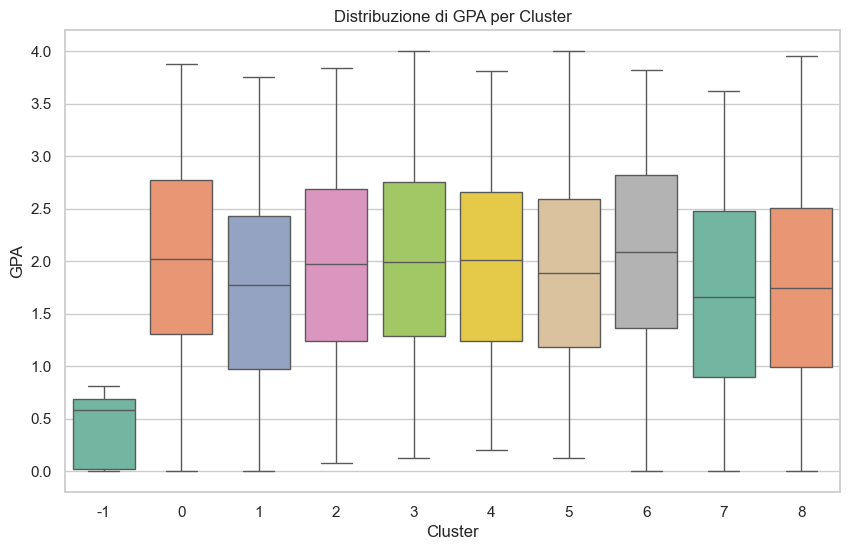

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea il boxplot per i valori di 'GPA' per ciascun cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='GPA', data=df_combined_DbScan, palette='Set2')

# Aggiungi etichette e titolo
plt.xlabel('Cluster')
plt.ylabel('GPA')
plt.title('Distribuzione di GPA per Cluster')

# Mostra il grafico
plt.show()


Mediamente chi fa musica ha un valore di GPA leggermente superiore rispetto a chi non fa musica. Nel caso del cluster raro/rumoroso la maggior parte delle persone praticano attività musicale ma stranamente il valore di GPA non è nella media del box plot ma ricade nei valori minimi.

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\39149701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Music', y='GPA', data=df_combined_DbScan, palette='Set2')


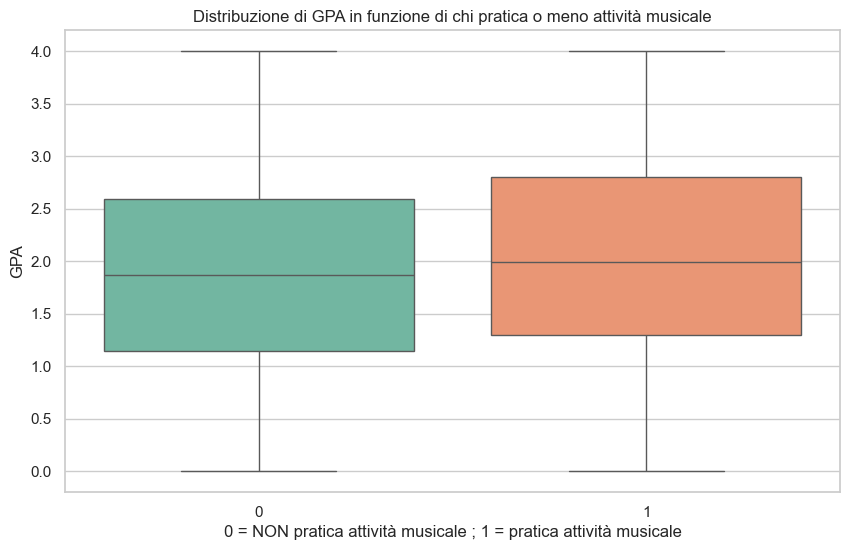

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea il grafico a boxplot per la distribuzione di GPA in funzione di 'Music'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Music', y='GPA', data=df_combined_DbScan, palette='Set2')

# Aggiungi etichette e titolo
plt.xlabel('0 = NON pratica attività musicale ; 1 = pratica attività musicale')
plt.ylabel('GPA')
plt.title('Distribuzione di GPA in funzione di chi pratica o meno attività musicale')

# Mostra il grafico
plt.show()


In [43]:
# Conta il numero di campioni per ciascun cluster
cluster_counts = df_combined_DbScan['Cluster'].value_counts()

# Stampa il numero di campioni per cluster
print(cluster_counts)


Cluster
 3    413
 0    387
 5    375
 1    336
 4    264
 7    240
 2    158
 8    117
 6     97
-1      5
Name: count, dtype: int64


In [44]:
df_combined_DbScan.sort_values(by='Music', ascending=False).head(20)

# Conta il numero di occorrenze di ciascun valore nella colonna 'Music'
music_counts = df_combined_DbScan['Music'].value_counts()

# Stampa il risultato
print(music_counts)


Music
0    1921
1     471
Name: count, dtype: int64


C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\2388475864.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_means, x='Cluster', y='Age', palette='viridis', ax=ax1)


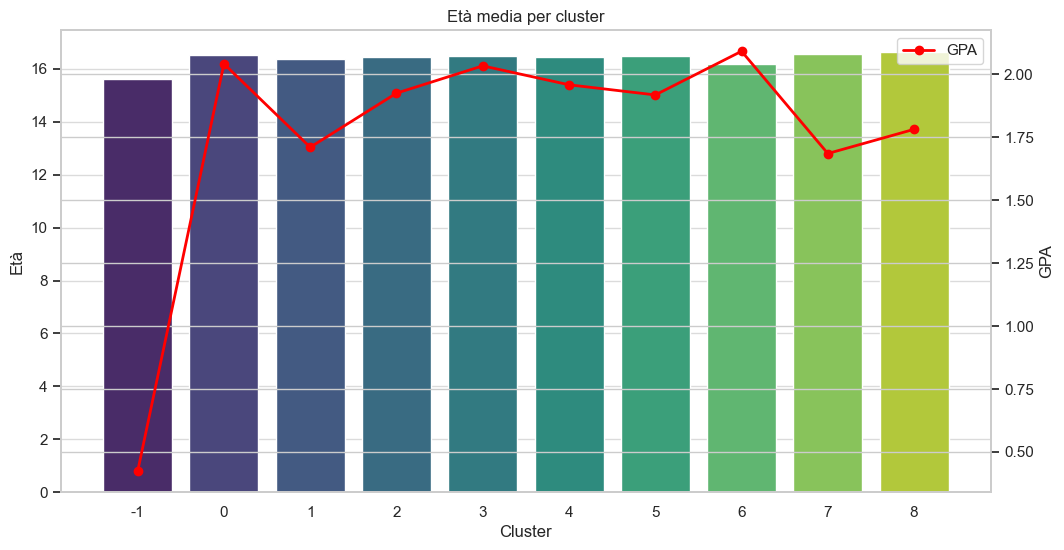

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assicurati che 'GPA' sia una colonna nel DataFrame
# Filtra i dati per escludere il rumore
df_filtered = df_combined_DbScan[df_combined_DbScan['Cluster'] != -2]

# Calcola il valore medio di Age per cluster
age_means = df_combined_DbScan.groupby('Cluster')['Age'].mean().reset_index()

# Calcola la media di GPA per cluster
gpa_means = df_combined_DbScan.groupby('Cluster')['GPA'].mean().reset_index()

# Imposta il tipo di cluster come categoria per un ordinamento migliore
age_means['Cluster'] = age_means['Cluster'].astype(int)
gpa_means['Cluster'] = gpa_means['Cluster'].astype(int)

# Ordina i valori per cluster
age_means = age_means.sort_values(by='Cluster')
gpa_means = gpa_means.sort_values(by='Cluster')

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per l'età media per cluster
sns.barplot(data=age_means, x='Cluster', y='Age', palette='viridis', ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Età')
ax1.set_title('Età media per cluster')
ax1.grid(axis='y', alpha=0.7)

# Crea un secondo asse y per la linea della media di GPA
ax2 = ax1.twinx()

# Aggiungi la linea rossa per la media di GPA
ax2.plot(gpa_means['Cluster']+1, gpa_means['GPA'], color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper right')

# Mostra il grafico
plt.show()


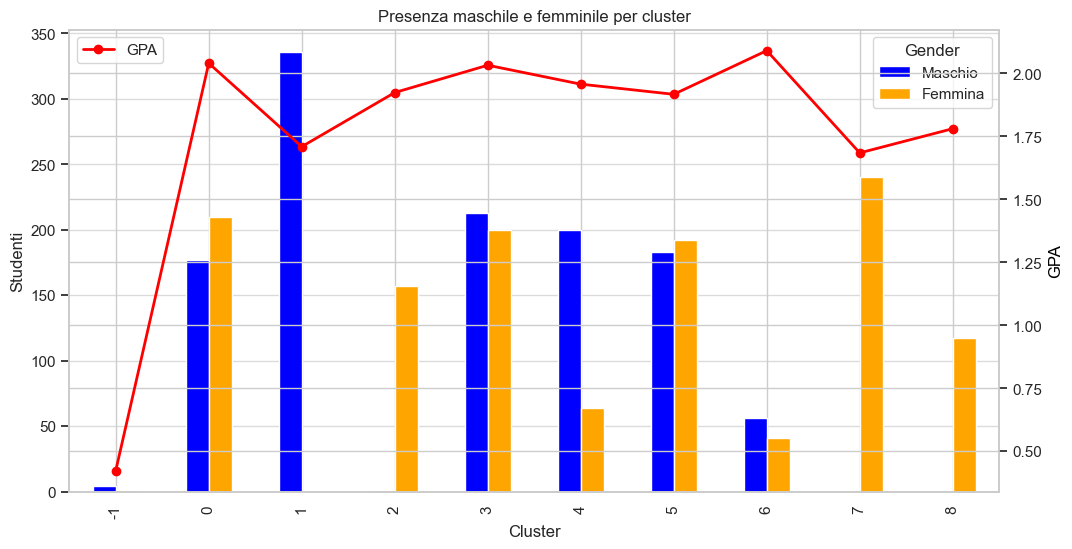

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteggio uomini (0) e donne (1) per cluster
gender_counts = df_combined_DbScan.groupby('Cluster')['Gender'].value_counts().unstack(fill_value=0)

# Calcola la media di GPA per ogni cluster
gpa_means = df_combined_DbScan.groupby('Cluster')['GPA'].mean()

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per il conteggio di uomini e donne per cluster
gender_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Studenti')
ax1.set_title('Presenza maschile e femminile per cluster')
ax1.legend(title='Gender', labels=['Maschio', 'Femmina'])
ax1.grid(axis='y', alpha=0.7)

# Aggiungi un secondo asse y per il valore di GPA
ax2 = ax1.twinx()

# Aggiungi una linea rossa per i valori di GPA medio
ax2.plot(gpa_means.index+1, gpa_means.values, color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA', color='black')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper left')

# Mostra il grafico
plt.show()


C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_12536\1643333145.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_means, x='Cluster', y='StudyTimeWeekly', palette='viridis', ax=ax1)


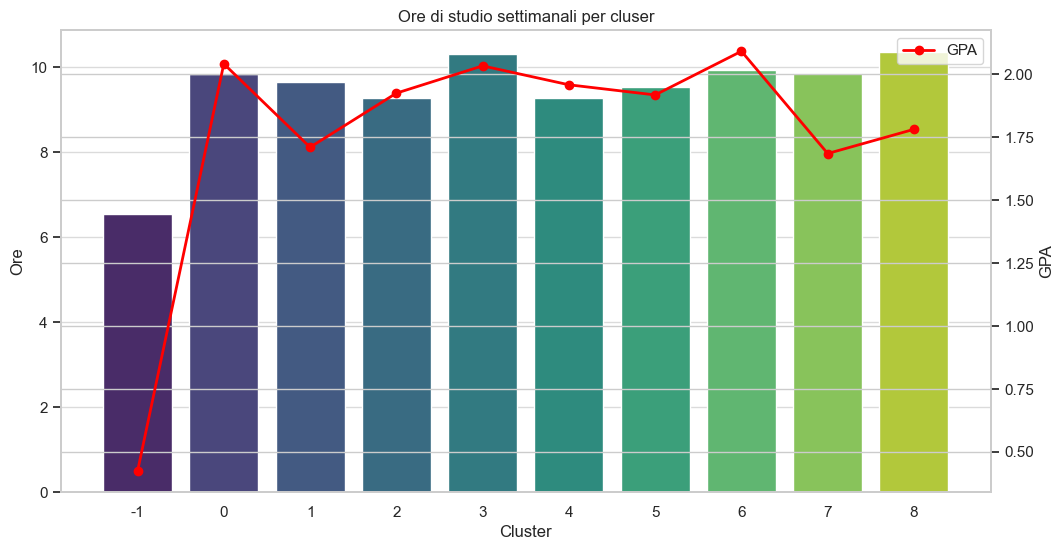

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calcola il valore medio di Age per cluster
age_means = df_combined_DbScan.groupby('Cluster')['StudyTimeWeekly'].mean().reset_index()

# Calcola la media di GPA per cluster
gpa_means = df_combined_DbScan.groupby('Cluster')['GPA'].mean().reset_index()

# Imposta il tipo di cluster come categoria per un ordinamento migliore
age_means['Cluster'] = age_means['Cluster'].astype(int)
gpa_means['Cluster'] = gpa_means['Cluster'].astype(int)

# Ordina i valori per cluster
age_means = age_means.sort_values(by='Cluster')
gpa_means = gpa_means.sort_values(by='Cluster')

# Crea il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico a barre per l'età media per cluster
sns.barplot(data=age_means, x='Cluster', y='StudyTimeWeekly', palette='viridis', ax=ax1)

# Aggiungi etichette e titolo per il grafico a barre
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Ore')
ax1.set_title('Ore di studio settimanali per cluser')
ax1.grid(axis='y', alpha=0.7)

# Crea un secondo asse y per la linea della media di GPA
ax2 = ax1.twinx()

# Aggiungi la linea rossa per la media di GPA
ax2.plot(gpa_means['Cluster']+1, gpa_means['GPA'], color='red', marker='o', label='GPA', linestyle='-', linewidth=2)

# Aggiungi etichetta per il secondo asse
ax2.set_ylabel('GPA')

# Aggiungi la legenda per la linea GPA
ax2.legend(loc='upper right')

# Mostra il grafico
plt.show()


## Performance modello

Punteggio medio silhouette: 0.38


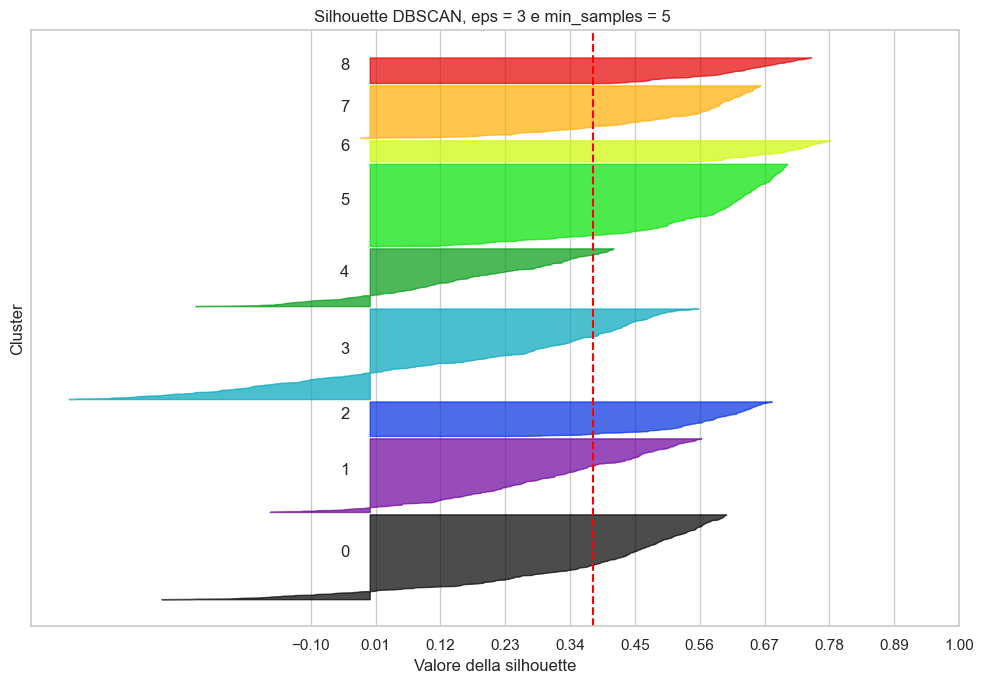

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcoliamo i valori di silhouette per ogni punto
sample_silhouette_values = silhouette_samples(df_scaled_tsne, db.labels_)

# Calcoliamo il punteggio medio della silhouette
silhouette_avg = silhouette_score(df_scaled_tsne, db.labels_)
print(f'Punteggio medio silhouette: {silhouette_avg:.2f}')

# Crea il grafico della silhouette
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

y_lower = 10  # Posizione iniziale per i cluster

# Prendiamo i cluster unici (ignoriamo il cluster -1 che rappresenta il rumore)
unique_labels = np.unique(db.labels_)
unique_labels = unique_labels[unique_labels != -1]  # Escludiamo il rumore (-1)

for i in unique_labels:
    # Ottieni i valori di silhouette per i punti appartenenti al cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[db.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Assegna un colore per ciascun cluster
    color = plt.cm.nipy_spectral(float(i) / len(unique_labels))
    
    # Traccia la zona della silhouette per il cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Etichetta per il cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # Aggiungiamo uno spazio tra i cluster

# Linea rossa per il punteggio medio della silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Etichette e titolo
ax.set_title("Silhouette DBSCAN, eps = 3 e min_samples = 5 ")
ax.set_xlabel("Valore della silhouette")
ax.set_ylabel("Cluster")

# Rimuoviamo le etichette sull'asse Y
ax.set_yticks([])

# Impostiamo i valori per l'asse X
ax.set_xticks(np.linspace(-0.1, 1.0, 11))

# Mostriamo il grafico
plt.tight_layout()
plt.show()
